In [1]:
import os
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# API Data Sources
List out the various API endpoints

In [2]:
# WiserTogether API
wt_api_base = 'http://meshintelapi.herokuapp.com/'
wt_orgs = 'organizations'
wt_gris = 'gris'

# TCData360 API
tc360_api_base = 'https://tcdata360-backend.worldbank.org/api/v1/'
tc360_datasets = 'datasets'
tc360_indicators = 'indicators'
tc360_countries = 'countries'

# Add WITS Data?


In [3]:
cwd = os.getcwd()
print(cwd)

/Users/yuvraj.sidhu/Documents/code/wbdata


In [4]:
# Pull in data sources and convert to pandas dataframes
org_data = json_normalize(requests.get(wt_api_base + wt_orgs).json())
gri_data = json_normalize(requests.get(wt_api_base + wt_gris).json())
datasets = json_normalize(requests.get(tc360_api_base + tc360_datasets).json())
indicators = json_normalize(requests.get(tc360_api_base + tc360_indicators).json())

In [5]:
# some parsing errors in the countries data so cleaning it up locally
countries = os.path.join(cwd, 'countries.json')
with open(countries) as data_file:
    countries = json.load(data_file)
countries = json_normalize(countries)

In [6]:
print("org_data: " + str(org_data.shape))
print("gri_data: " + str(gri_data.shape))
print("datasets: " + str(datasets.shape))
print("indicators: " + str(indicators.shape))
print("countries: " + str(countries.shape))

org_data: (201, 1057)
gri_data: (28, 10)
datasets: (93, 7)
indicators: (3880, 17)
countries: (217, 14)


In [7]:
# flattened the json but there are still aggregate rows for industry...
# need to remove these rows based on null value for aggrgateIndustry1 since that column always
# contains a value if it's an organization and null if its an aggregation
org_data = org_data.dropna(axis=0, subset=['aggregateIndustry.aggregateIndustry1'])

In [8]:
print("org_data: " + str(org_data.shape))

org_data: (189, 1057)


In [9]:
org_data[:5]

,aggregateIndustry.aggregateIndustry1,aggregateIndustry.aggregateIndustry2,cityName,countryName,dateEstablished,exportsUpstreamness,gapUpstreamness,gris.reports,gris.scores.economic.averageOverallScoreByCountry,gris.scores.economic.averageOverallScoreByIndustry,...,topCountriesSuppliedFromVolume.Uruguay,topCountriesSuppliedFromVolume.Venezuela,topCountriesSuppliedFromVolume.Vietnam,topCountriesSuppliedFromVolume.Western Samoa,totalValueBought,totalValueSold,typeOfOrganization,url,volumeBought,volumeSold
0,Manufacturing,NaN,La Habana Heights,United States,2000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,www.westportinnovations.net,NaN,NaN
1,Manufacturing,Consumer,Duisburg,Germany,1906,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,www.kloeckner.de,NaN,NaN
2,Manufacturing,Healthcare,Irvine,United States,1977,NaN,NaN,"[{'baseYear': '2015', 'indicators': [{'average...",-0.66,5.12,...,NaN,NaN,NaN,NaN,6.413326e+08,NaN,consignee,www.allergan.com,1133.19,NaN
3,Manufacturing,NaN,Memphis,United States,2006,2.34,-0.81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.666579e+04,15858017.65,consignee-shipper,www.versopaper.com,2.78,6288209.08
4,Manufacturing,Consumer,Bentonville,United States,1969,2.18,-0.69,"[{'baseYear': '2016', 'indicators': [{'average...",-0.66,5.12,...,NaN,NaN,369.4,NaN,3.061791e+09,5764615.20,consignee-shipper,www.corporate.walmart.com,608409.95,1252579.50


In [10]:
gri_data[:5]

,aspectScale,associatedSDGTargets,g4AspectCode,g4AspectSubIndicatorDescription,g4AspectTitle,g4ToStandardsDisclosureMapping,impactCategory,indicatorId,sdgOverallPrimary,subIndicatorDefinition
0,US$,"[8.1, 9.1, 9.4, 9.5]",G4-EC1,Direct economic value generated and distributed,Economic Impact,201-1,Economic,1,"8,9",(1) Direct economic value generated: Revenues;...
1,US$,"[9.1, 9.4, 11.2]",G4-EC7,Value of infrastructure investments and servic...,Infrastructure Investments,203-1,Economic,2,"9,11",Total cost of significant infrastructure inves...
2,%,NaN,G4-EC9,Proportion of spending on local suppliers,Local suppliers,204-1,Economic,3,"8,12",Percentage of the procurement budget used for ...
3,Hours,"[4.3, 4.4, 4.5, 5.1, 8.5]",G4-LA9,Average hours of training per year per employee,Education and skills,404-1,Social,4,"4,5,8",Average hours of training that the organizatio...
4,%,[5.1],G4-LA11,Percentage of employees receiving regular perf...,Education and skills,404-3,Social,5,"8,5",Percentage of total employees by GENDER who re...


In [11]:
datasets[:5]

,description,id,legal,link,slug,source,title
0,,919,"For use guidelines, please consult ArabBaromet...",http://www.arabbarometer.org/instruments-and-d...,ARAB,ArabBarometer,ArabBarometer
1,I-TIP Goods provides comprehensive information...,44,"For use guidelines, please consult World Trade...",https://i-tip.wto.org/goods,itip_goods,WTO I-TIP Goods,I-TIP Goods
2,The Temporary Trade Barriers Database (TTBD) w...,64,"For use guidelines, please consult World Bank ...",http://econ.worldbank.org/ttbd/,temporary_trade_barriers,WBG - Temporary Trade Barriers,Temporary Trade Barriers Database
3,"For much of human history, most individuals ha...",54,"For use guidelines, please consult Heritage In...",http://www.heritage.org/index/download,heritage_index_of_economic_freedom,Heritage Index of Economic Freedom,Heritage Index of Economic Freedom
4,PEFA was established as a means to reduce the ...,590,"For use guidelines, please consult World Bank ...",https://pefa.org/assessments/listing,PEFA,Public Expenditure Financial Accontability (PEFA),Public Expenditure Financial Accontability


In [12]:
indicators[:5]

,byPartner,byProduct,dataset,datasetId,datasetLink,dateRange,defaultViz,definition,doNotUseViz,id,name,periodicity,rank,subindicatorType,timeframes,units,valueType
0,False,False,Doing Business,52,http://www.doingbusiness.org/,2015-2017,line_chart,This reflects the global distance to frontier ...,"[spider_chart, slope_graph, chord_diagram]",40001,Ease of Doing Business Global DTF (DB17-18 met...,annually,1.001,Distance to Frontier,"[2015, 2016, 2017]",Distance to Frontier,dtf
1,False,False,Doing Business,52,http://www.doingbusiness.org/,2017-2017,bar_chart,The presence of rules that establish and clari...,"[line_chart, slope_graph, spider_chart, chord_...",415,Ease of Doing Business Ranking,once,1.001,Rank,[2017],Rank,rank
2,False,False,World Development Indicators,56,http://data.worldbank.org/data-catalog/world-d...,1961-2017,line_chart,Annual percentage growth rate of GDP at market...,"[spider_chart, slope_graph, chord_diagram]",940,GDP growth (annual %),annually,1.001,Value,"[2017, 2016, 2015, 2014, 2013, 2012, 2011, 201...",Annual %,value
3,False,False,World Development Indicators,56,http://data.worldbank.org/data-catalog/world-d...,1970-2017,line_chart,Foreign direct investment are the net inflows ...,"[spider_chart, slope_graph, chord_diagram]",1541,"Foreign direct investment, net inflows (% of GDP)",annually,1.001,Value,"[2017, 2016, 2015, 2014, 2013, 2012, 2011, 201...",% of GDP,value
4,False,False,World Economic Forum Global Competitiveness Index,53,http://reports.weforum.org/global-competitiven...,2007-2017,line_chart,"In your country, how easy is it for entreprene...","[spider_chart, slope_graph, chord_diagram]",529,"Venture capital availability, 1-7 (best)",annually,1.001,Index 1-7 (best),"[2007-2008, 2008-2009, 2009-2010, 2010-2011, 2...",Index 1-7 (best),value


In [13]:
countries[10:20]

,adminRegion,aggregate,capitalCity,geo.lat,geo.lng,id,incomeLevel,iso2,iso3,landlocked,lendingType,name,region,sids
10,NA,0,Canberra,-35.282,149.129,AUS,HIC,AU,AUS,0.0,LNX,Australia,EAS,0.0
11,NA,0,Vienna,48.2201,16.3798,AUT,HIC,AT,AUT,1.0,LNX,Austria,ECS,0.0
12,ECA,0,Baku,40.3834,49.8932,AZE,UMC,AZ,AZE,1.0,IBD,Azerbaijan,ECS,0.0
13,NA,0,Nassau,25.0661,-77.339,BHS,HIC,BS,BHS,0.0,LNX,"Bahamas, The",LCN,1.0
14,NA,0,Manama,26.1921,50.5354,BHR,HIC,BH,BHR,0.0,LNX,Bahrain,MEA,1.0
15,SAS,0,Dhaka,23.7055,90.4113,BGD,LMC,BD,BGD,0.0,IDX,Bangladesh,SAS,0.0
16,NA,0,Bridgetown,13.0935,-59.6105,BRB,HIC,BB,BRB,0.0,LNX,Barbados,LCN,1.0
17,ECA,0,Minsk,53.9678,27.5766,BLR,UMC,BY,BLR,1.0,IBD,Belarus,ECS,0.0
18,NA,0,Brussels,50.8371,4.36761,BEL,HIC,BE,BEL,0.0,LNX,Belgium,ECS,0.0
19,LAC,0,Belmopan,17.2534,-88.7713,BLZ,UMC,BZ,BLZ,0.0,IBD,Belize,LCN,0.0


In [14]:
# can we map from WT Org data to TCData? Let's look at the mapping to countries...
wt_countries = set(list(org_data['countryName']))
tc_countries = set(list(countries['name']))

In [15]:
wt_countries

{'Brazil',
 'Canada',
 'China',
 'Denmark',
 'Findland',
 'France',
 'Germany',
 'Ghana',
 'Greece',
 'India',
 'Ireland',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malaysia',
 'Netherlands',
 'Russian Federation',
 'South Africa',
 'Spain',
 'Switzerland',
 'Thailand',
 'Turkey',
 'United Arab Emirates',
 'United Kingdom',
 'United States'}

In [16]:
tc_countries

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 'Cote dIvoire',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Poly

In [17]:
for x in wt_countries:
    if x not in tc_countries:
        print(x)

Findland


In [18]:
# looks like a spelling mistake in WiserTogether - let's fix that
mask = org_data.countryName == "Findland"
column_name = 'countryName'
org_data.loc[mask, column_name] = "Finland"

In [19]:
wt_countries = set(list(org_data['countryName']))
count = 0
for x in wt_countries:
    if x not in tc_countries:
        print(x)
        count += 1
        
print("count: " + str(count))

count: 0


In [20]:
# so now we should be able to connect WT and TC datasets based on WT organization countryName = TC country name
# as WT org data grows we'll need to ensure new org countries have a match in TC dataset

# Exploratory Data Analysis
### focused on Gemma's request for breakdowns by country, industry and indicators

In [21]:
# count of organizations by country
country_counts = org_data.countryName.value_counts(normalize=False, sort=True, ascending=False)
print(country_counts)

United States           129
United Kingdom           11
Switzerland               8
Germany                   6
Netherlands               5
Ireland                   3
Denmark                   3
United Arab Emirates      2
Luxembourg                2
Turkey                    2
Spain                     2
France                    2
India                     2
Malaysia                  1
Canada                    1
Ghana                     1
China                     1
Greece                    1
Kuwait                    1
Russian Federation        1
Finland                   1
South Africa              1
Japan                     1
Thailand                  1
Brazil                    1
Name: countryName, dtype: int64


In [22]:
# count of organizations by industry
industry_counts = org_data['aggregateIndustry.aggregateIndustry1'].value_counts(normalize=False, sort=True, ascending=False)
print(industry_counts)

Manufacturing                       92
Consumer                            25
Financial Services and Investors    21
Professional Services               12
Energy                              11
ICT                                  9
Basic and Infrastructure             8
Media Entertainment & Technology     4
Mobility                             3
Other                                2
Healthcare                           2
Name: aggregateIndustry.aggregateIndustry1, dtype: int64


In [23]:
industry_counts = org_data['aggregateIndustry.aggregateIndustry2'].value_counts(normalize=False, sort=True, ascending=False)
print(industry_counts)

ICT              20
Manufacturing    17
Consumer         13
Healthcare        9
Mobility          4
Name: aggregateIndustry.aggregateIndustry2, dtype: int64


In [24]:
from scipy import stats
import missingno as msno

In [25]:
gri_cols = [col for col in org_data if col.startswith('gri')]
gri_cols

['gris.reports',
 'gris.scores.economic.averageOverallScoreByCountry',
 'gris.scores.economic.averageOverallScoreByIndustry',
 'gris.scores.economic.economicImpact.averageScoreByCountry',
 'gris.scores.economic.economicImpact.averageScoreByIndustry',
 'gris.scores.economic.indicators.economicImpact.averageScoreByCountry',
 'gris.scores.economic.indicators.economicImpact.averageScoreByIndustry',
 'gris.scores.economic.indicators.economicImpact.indicatorIds',
 'gris.scores.economic.indicators.economicImpact.rankInCountry',
 'gris.scores.economic.indicators.economicImpact.rankInIndustry',
 'gris.scores.economic.indicators.economicImpact.score',
 'gris.scores.economic.indicators.infrastructureInvestments.averageScoreByCountry',
 'gris.scores.economic.indicators.infrastructureInvestments.averageScoreByIndustry',
 'gris.scores.economic.indicators.infrastructureInvestments.indicatorIds',
 'gris.scores.economic.indicators.infrastructureInvestments.rankInCountry',
 'gris.scores.economic.indicat

In [26]:
# let's remove the aggregation columns and add country and industry columns to get a sense of data completeness for
# the various impact areas and indicators
ind = ['countryName', 
       'aggregateIndustry.aggregateIndustry1', 
       'gris.reports',
       'gris.scores.impactScore',
       'gris.scores.economic.overallScore',
       'gris.scores.economic.indicators.economicImpact.score', 
       'gris.scores.economic.indicators.infrastructureInvestments.score',
       'gris.scores.economic.indicators.localSuppliers.score',
       'gris.scores.environmental.overallScore',
       'gris.scores.environmental.indicators.climateAndEnergy.score',
       'gris.scores.environmental.indicators.sustainableSourcing.score',
       'gris.scores.environmental.indicators.waterAndLandUse.score',
       'gris.scores.governance.overallScore',
       'gris.scores.governance.indicators.corruption.score',
       'gris.scores.governance.indicators.politicalContributionsAndTransfers.score',
       'gris.scores.social.overallScore',
       'gris.scores.social.indicators.educationAndSkills.score',
       'gris.scores.social.indicators.healthAndSafety.score',]

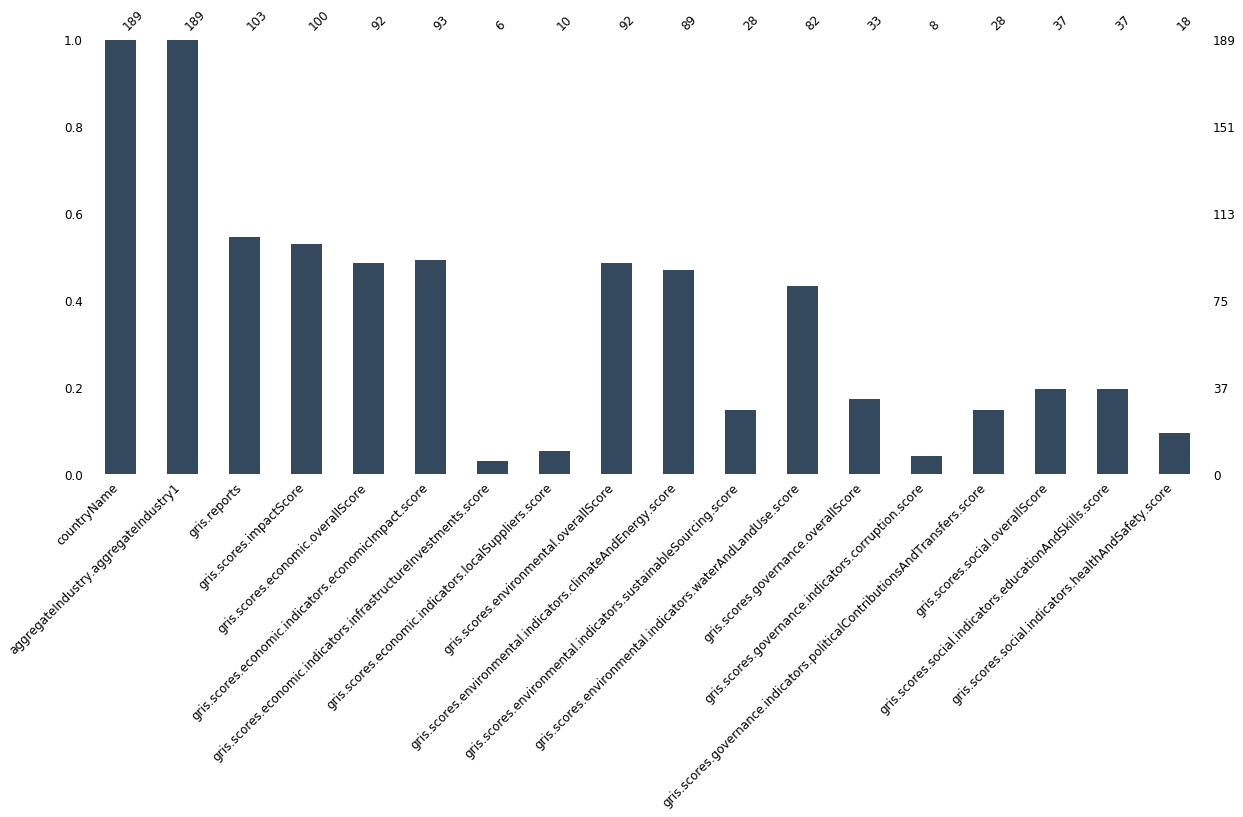

In [27]:
msno.bar(org_data[ind], figsize=(20,8),color="#34495e",fontsize=12,labels=True,)

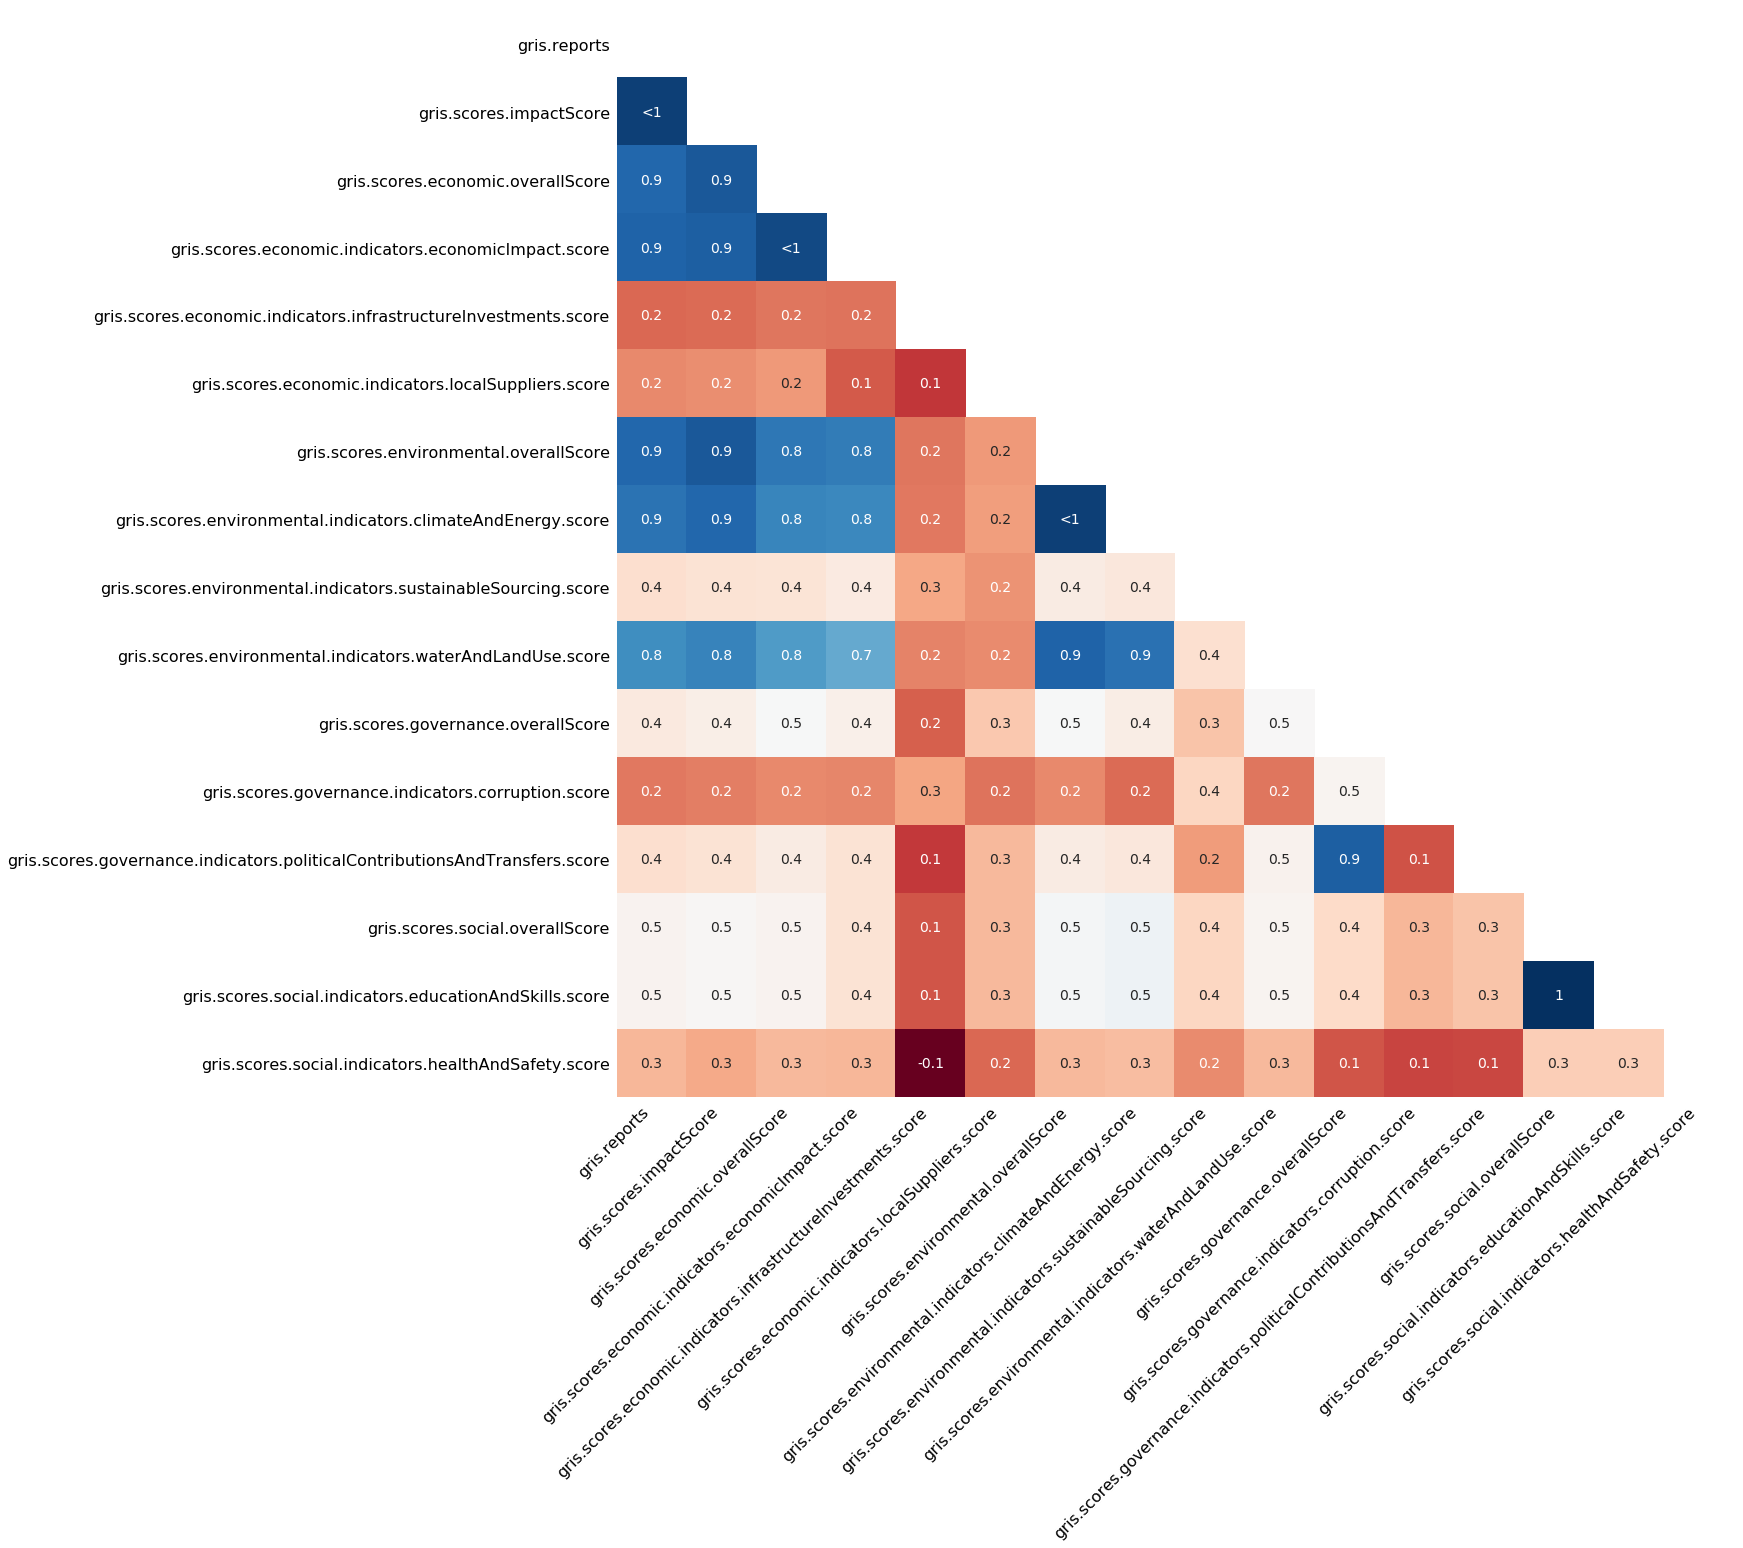

In [28]:
# visualize missing value correlations
msno.heatmap(org_data[ind],figsize=(20,20))

In [29]:
# let's take a look at one of the datasets in TCData360 - World Economic Forum Global Competitiveness Index
# get the indicators included in dataset number 53
tc53_ind = indicators[indicators['datasetId'] == 53]

In [30]:
tc53_ind

,byPartner,byProduct,dataset,datasetId,datasetLink,dateRange,defaultViz,definition,doNotUseViz,id,name,periodicity,rank,subindicatorType,timeframes,units,valueType
4,False,False,World Economic Forum Global Competitiveness Index,53,http://reports.weforum.org/global-competitiven...,2007-2017,line_chart,"In your country, how easy is it for entreprene...","[spider_chart, slope_graph, chord_diagram]",529,"Venture capital availability, 1-7 (best)",annually,1.001,Index 1-7 (best),"[2007-2008, 2008-2009, 2009-2010, 2010-2011, 2...",Index 1-7 (best),value
5,False,False,World Economic Forum Global Competitiveness Index,53,http://reports.weforum.org/global-competitiven...,2007-2017,line_chart,"In your country, how easy is it for entreprene...","[spider_chart, chord_diagram]",530,"Venture capital availability, 1-7 (best)",annually,1.001,Rank,"[2007-2008, 2008-2009, 2009-2010, 2010-2011, 2...",Rank,rank
69,False,False,World Economic Forum Global Competitiveness Index,53,http://reports.weforum.org/global-competitiven...,2007-2017,line_chart,The GCI analyses competitiveness along 12 pill...,"[spider_chart, chord_diagram]",632,Global Competitiveness Index,annually,2.030,Rank,"[2007-2008, 2008-2009, 2009-2010, 2010-2011, 2...",Value,Rank
70,False,False,World Economic Forum Global Competitiveness Index,53,http://reports.weforum.org/global-competitiven...,2007-2017,line_chart,"In your country, how efficient are the customs...","[spider_chart, chord_diagram]",724,Burden of customs procedures,annually,2.030,Rank,"[2007-2008, 2008-2009, 2009-2010, 2010-2011, 2...",Value,Rank
71,False,False,World Economic Forum Global Competitiveness Index,53,http://reports.weforum.org/global-competitiven...,2007-2017,line_chart,The GCI analyses competitiveness along 12 pill...,"[spider_chart, slope_graph, chord_diagram]",631,Global Competitiveness Index,annually,2.030,Value,"[2007-2008, 2008-2009, 2009-2010, 2010-2011, 2...",Index,Value
72,False,False,World Economic Forum Global Competitiveness Index,53,http://reports.weforum.org/global-competitiven...,2007-2017,line_chart,"In your country, how efficient are the customs...","[spider_chart, slope_graph, chord_diagram]",723,Burden of customs procedures,annually,2.030,1-7 Best,"[2007-2008, 2008-2009, 2009-2010, 2010-2011, 2...",Index,1-7 Best
73,False,False,World Economic Forum Global Competitiveness Index,53,http://reports.weforum.org/global-competitiven...,2007-2017,line_chart,"In your country, how would you rate the ethica...","[spider_chart, chord_diagram]",666,Public trust in politicians,annually,2.040,Rank,"[2007-2008, 2008-2009, 2009-2010, 2010-2011, 2...",Value,Rank
74,False,False,World Economic Forum Global Competitiveness Index,53,http://reports.weforum.org/global-competitiven...,2007-2017,line_chart,"In your country, how would you rate the ethica...","[spider_chart, slope_graph, chord_diagram]",665,Public trust in politicians,annually,2.040,1-7 Best,"[2007-2008, 2008-2009, 2009-2010, 2010-2011, 2...",Index,1-7 Best
75,False,False,World Economic Forum Global Competitiveness Index,53,http://reports.weforum.org/global-competitiven...,2007-2017,line_chart,The Institutions Index is one of the Global Co...,"[spider_chart, chord_diagram]",726,1st pillar Institutions,annually,2.080,Rank,"[2007-2008, 2008-2009, 2009-2010, 2010-2011, 2...",Value,Rank
76,False,False,World Economic Forum Global Competitiveness Index,53,http://reports.weforum.org/global-competitiven...,2007-2017,line_chart,The Institutions Index is one of the Global Co...,"[spider_chart, slope_graph, chord_diagram]",725,1st pillar Institutions,annually,2.080,Value,"[2007-2008, 2008-2009, 2009-2010, 2010-2011, 2...",Index,Value


In [31]:
tc53_ind.shape

(244, 17)

In [32]:
# there are 244 indicator series for countries in this dataset. The API does not respond to even the most restricted
# parameters so you have to use the csv download - https://tcdata360-backend.worldbank.org/api/v1/datasets/53/dump.csv
path = os.path.join(cwd, '53-WEF.csv')
tc53 = pd.read_csv(path, index_col=0, parse_dates=True)

In [33]:
tc53[225:500]

,Country Name,Indicator,Subindicator Type,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018
Country ISO3,,,,,,,,,,,,,,
AGO,Angola,Transparency of government policymaking,Rank,NaN,NaN,NaN,127.000000,124.000000,NaN,144.000000,137.000000,NaN,NaN,NaN
AGO,Angola,"Tuberculosis cases/100,000 pop.",Rank,NaN,NaN,NaN,119.000000,124.000000,NaN,134.000000,130.000000,NaN,NaN,NaN
AGO,Angola,"Tuberculosis cases/100,000 pop.",Value,NaN,NaN,NaN,292.116859,298.000000,NaN,310.000000,316.000000,NaN,NaN,NaN
AGO,Angola,University-industry collaboration in Research ...,1-7 Best,NaN,NaN,NaN,2.387748,2.069078,NaN,2.181818,2.012764,NaN,NaN,NaN
AGO,Angola,University-industry collaboration in Research ...,Rank,NaN,NaN,NaN,136.000000,138.000000,NaN,144.000000,142.000000,NaN,NaN,NaN
AGO,Angola,"Value chain breadth, 1-7 (best)",Rank,NaN,NaN,NaN,139.000000,142.000000,NaN,144.000000,144.000000,NaN,NaN,NaN
AGO,Angola,"Value chain breadth, 1-7 (best)",Value,NaN,NaN,NaN,1.699632,1.790196,NaN,2.657143,2.641476,NaN,NaN,NaN
AGO,Angola,"Venture capital availability, 1-7 (best)",Index 1-7 (best),NaN,NaN,NaN,1.802891,1.494084,NaN,2.117647,2.348170,NaN,NaN,NaN
AGO,Angola,"Venture capital availability, 1-7 (best)",Rank,NaN,NaN,NaN,129.000000,140.000000,NaN,119.000000,98.000000,NaN,NaN,NaN


In [34]:
# we're only interested in indicators that are 'Pillars' and absolute values for those indicators (1-7 Best)
mask = (tc53['Subindicator Type'] == 'Value') & (tc53['Indicator'].str.contains('pillar'))
tc53_filtered = tc53[mask]

In [35]:
tc53_filtered[:25]

,Country Name,Indicator,Subindicator Type,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018
Country ISO3,,,,,,,,,,,,,,
AGO,Angola,12th pillar Innovation,Value,NaN,NaN,NaN,2.358215,2.052514,NaN,2.145923,2.117803,NaN,NaN,NaN
AGO,Angola,1st pillar Institutions,Value,NaN,NaN,NaN,3.219175,2.906737,NaN,2.759893,2.606999,NaN,NaN,NaN
AGO,Angola,2nd pillar Infrastructure,Value,NaN,NaN,NaN,1.881551,1.887377,NaN,1.920763,2.014314,NaN,NaN,NaN
AGO,Angola,3rd pillar Macroeconomic environment,Value,NaN,NaN,NaN,3.614605,4.227984,NaN,5.026033,4.695090,NaN,NaN,NaN
AGO,Angola,4th pillar Health and primary education,Value,NaN,NaN,NaN,2.660120,2.887118,NaN,3.693878,3.539878,NaN,NaN,NaN
AGO,Angola,5th pillar Higher education and training,Value,NaN,NaN,NaN,2.125376,1.908271,NaN,2.066497,1.939449,NaN,NaN,NaN
AGO,Angola,9th pillar Technological readiness,Value,NaN,NaN,NaN,2.592185,2.652359,NaN,2.470470,2.340303,NaN,NaN,NaN
ALB,Albania,12th pillar Innovation,Value,2.099299,2.218238,2.429968,2.566654,2.579218,2.630687,2.796915,2.734722,2.764672,2.961890,3.199174
ALB,Albania,1st pillar Institutions,Value,3.141745,3.323133,3.619045,3.957185,4.006511,3.648976,3.319569,3.381955,3.683276,3.832056,3.877966
